In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support,confusion_matrix
import joblib
import pickle

In [444]:
df = pd.read_csv('flightdatass.csv', encoding='cp1252',encoding_errors='ignore')
df.head(2)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [448]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

## Analysing the data

<Axes: ylabel='Frequency'>

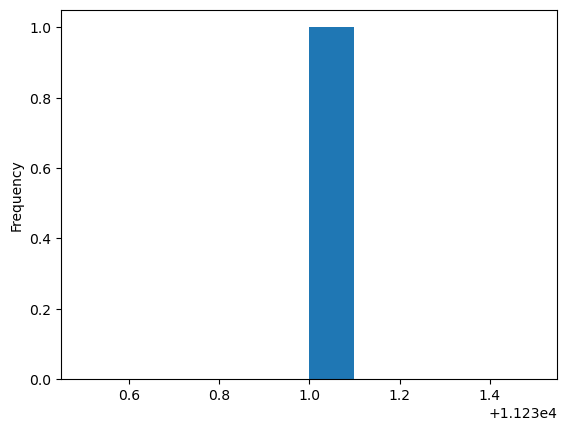

In [451]:
df['YEAR'].value_counts().plot(kind = 'hist')

###    YEAR: The year when the flight occurred.
###    QUARTER: The quarter of the year (1 to 4) when the flight took place.
###    MONTH: The month (1 to 12) when the flight occurred.
###    DAY_OF_MONTH: The day of the month when the flight took place.
###    DAY_OF_WEEK: The day of the week (1 for Monday, 7 for Sunday) when the flight occurred.
###    UNIQUE_CARRIER: The unique identifier for the airline.
###    TAIL_NUM: The aircraft tail number, which is a unique identifier for the plane.
###    FL_NUM: The flight number assigned by the airline.
###    ORIGIN_AIRPORT_ID: The unique identifier for the origin airport.
###    ORIGIN: The origin airport's code (e.g., LAX for Los Angeles International Airport).
###    DEST_AIRPORT_ID: The unique identifier for the destination airport.
###    DEST: The destination airport's code.
###    CRS_DEP_TIME: The scheduled departure time (Computer Reservation System time).
###    DEP_TIME: The actual departure time.
###    DEP_DELAY: The departure delay in minutes.
###    DEP_DEL15: Indicates whether the departure was delayed by 15 minutes or more (1 for yes, 0 for no).
###    CRS_ARR_TIME: The scheduled arrival time (Computer Reservation System time).
###    ARR_TIME: The actual arrival time.
###    ARR_DELAY: The arrival delay in minutes.
###    ARR_DEL15: Indicates whether the arrival was delayed by 15 minutes or more (1 for yes, 0 for no).
###    CANCELLED: Indicates whether the flight was canceled (1 for yes, 0 for no).
###    DIVERTED: Indicates whether the flight was diverted to a different airport (1 for yes, 0 for no).
###    CRS_ELAPSED_TIME: The scheduled elapsed time for the flight, in minutes.
###    ACTUAL_ELAPSED_TIME: The actual elapsed time for the flight, in minutes.
###    DISTANCE: The distance between the origin and destination airports, in miles.

<h2 style = 'color:red;'>Analysing the Delays with respect to time and date</h2>

<Axes: xlabel='DAY_OF_MONTH', ylabel='DAY_OF_WEEK'>

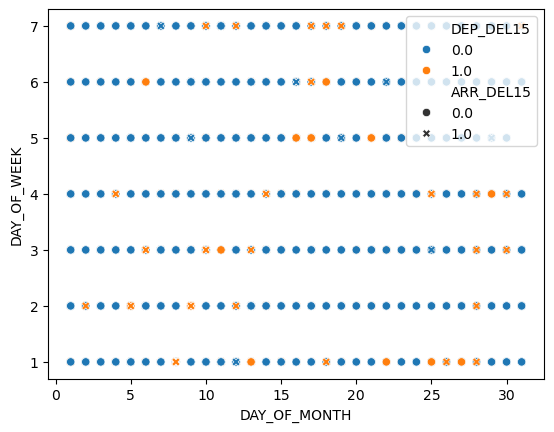

In [454]:
sb.scatterplot(x="DAY_OF_MONTH",y="DAY_OF_WEEK",hue = "DEP_DEL15",style = "ARR_DEL15",data = df)

In [456]:
numeric_df = pd.DataFrame()
for cols in df.columns:
    if pd.api.types.is_numeric_dtype(df[cols]):
        numeric_df[cols] = df[cols]

In [457]:
numeric_df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,1399,10397,14747,1905,1907.0,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,1476,11433,13487,1345,1344.0,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,1597,10397,14747,940,942.0,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,1768,14747,13487,819,820.0,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,1823,14747,11433,2300,2256.0,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,1715,11433,10397,1005,1003.0,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,1770,14747,13487,1525,1559.0,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,1823,11433,14747,1959,1959.0,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,1901,10397,14747,1530,1529.0,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


<Axes: >

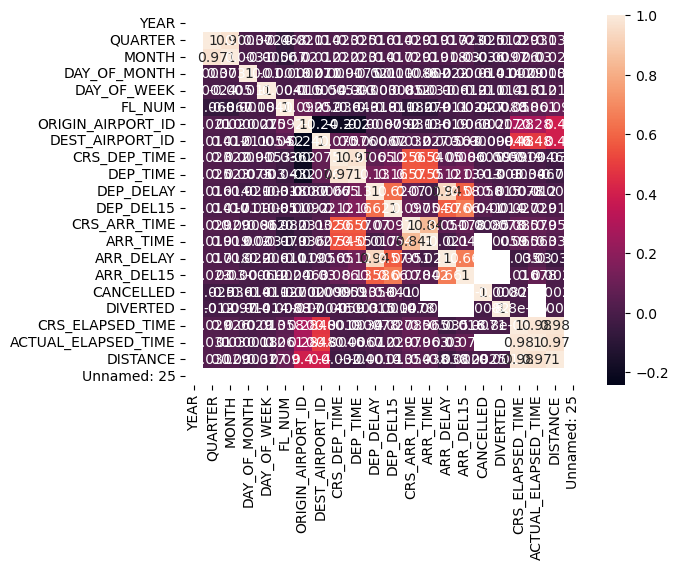

In [458]:
sb.heatmap(numeric_df.corr(),annot=True)

## Above lookks congusted so taking only 12 columns i.e from 0 to 11

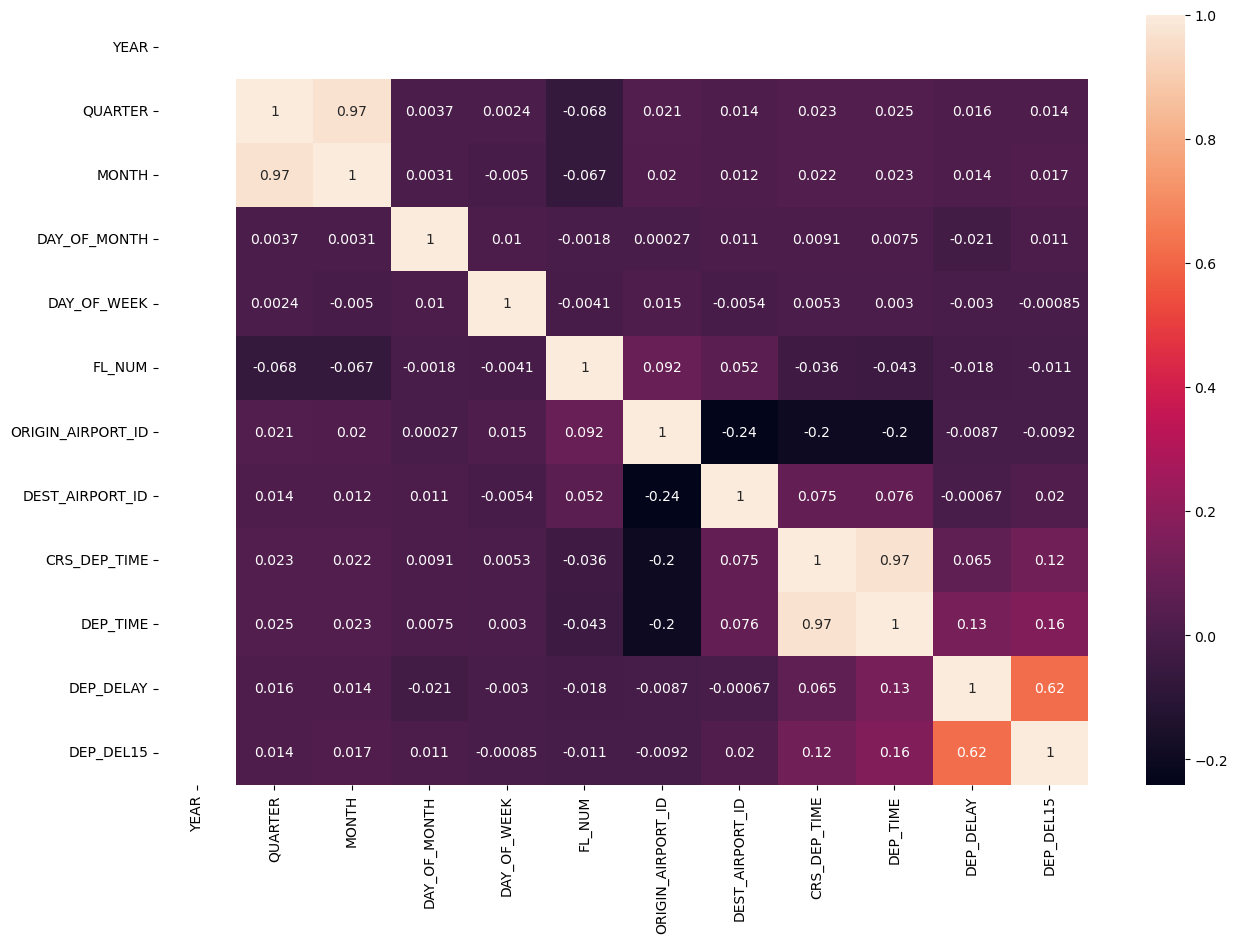

In [460]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(numeric_df.iloc[:,:12].corr(),annot=True,ax=ax)
plt.show()

In [464]:
numeric_df.iloc[12:]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
12,2016,1,1,2,6,2610,10397,13487,725,721.0,...,904,903.0,-1.0,0.0,0.0,0.0,159.0,162.0,907.0,NaN
13,2016,1,1,2,6,2826,11433,14747,835,841.0,...,1047,1023.0,-24.0,0.0,0.0,0.0,312.0,282.0,1927.0,NaN
14,2016,1,1,2,6,2845,11433,10397,1624,1622.0,...,1830,1805.0,-25.0,0.0,0.0,0.0,126.0,103.0,594.0,NaN
15,2016,1,1,3,7,86,13487,11433,1345,1337.0,...,1620,1616.0,-4.0,0.0,0.0,0.0,95.0,99.0,528.0,NaN
16,2016,1,1,3,7,423,12478,10397,1300,1258.0,...,1538,1519.0,-19.0,0.0,0.0,0.0,158.0,141.0,760.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,1715,11433,10397,1005,1003.0,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,1770,14747,13487,1525,1559.0,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,1823,11433,14747,1959,1959.0,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,1901,10397,14747,1530,1529.0,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [465]:
df = df[['ORIGIN','FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','DEP_DEL15','CRS_ARR_TIME','ARR_DEL15']]

In [470]:
df

,ORIGIN,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,ATL,1399,1,1,5,ATL,SEA,0.0,2143,0.0
1,DTW,1476,1,1,5,DTW,MSP,0.0,1435,0.0
2,ATL,1597,1,1,5,ATL,SEA,0.0,1215,0.0
3,SEA,1768,1,1,5,SEA,MSP,0.0,1335,0.0
4,SEA,1823,1,1,5,SEA,DTW,0.0,607,0.0
...,...,...,...,...,...,...,...,...,...,...
11226,DTW,1715,12,30,5,DTW,ATL,0.0,1223,0.0
11227,SEA,1770,12,30,5,SEA,MSP,1.0,2046,0.0
11228,DTW,1823,12,30,5,DTW,SEA,0.0,2210,0.0
11229,ATL,1901,12,30,5,ATL,SEA,0.0,1806,0.0


In [472]:
df.isnull().sum()

ORIGIN            0
FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
DEP_DEL15       107
CRS_ARR_TIME      0
ARR_DEL15       188
dtype: int64

In [474]:
df.fillna(df['DEP_DEL15'].mean(),inplace = True)
df.fillna(df['ARR_DEL15'].mean(),inplace = True)
# df['DEP_DEL15'].mean()

In [476]:
df.isnull().sum()

ORIGIN          0
FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
DEP_DEL15       0
CRS_ARR_TIME    0
ARR_DEL15       0
dtype: int64

<Axes: ylabel='CRS_ARR_TIME'>

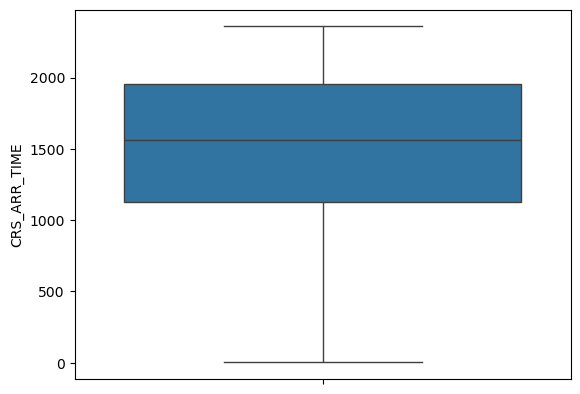

In [478]:
sb.boxplot(data = df['CRS_ARR_TIME'])

<h2 style = 'color:red;'>No outliers for a given column</h2>

## PERFORMING ONEHOT ENCODING FOR GIVEN CATEGORICAL COLUMN

In [482]:
df = pd.get_dummies(df,columns=['ORIGIN','DEST'],dtype = 'int')


In [484]:
df['ARR_DEL15'] = df['ARR_DEL15'].astype(int)
df['DEP_DEL15'] = df['DEP_DEL15'].astype(int)

In [492]:
duplicates = df.columns[df.columns.duplicated()]

In [496]:
duplicates

Index(['ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK', 'ORIGIN_MSP', 'ORIGIN_SEA'], dtype='object')

In [498]:
# Remove duplicate columns, keeping the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

In [500]:
X = df[[ 'FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'CRS_ARR_TIME', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK', 'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL',  'DEST_DTW', 'DEST_JFK', 'DEST_MSP', 'DEST_SEA']]
Y = df[['ARR_DEL15']]

In [502]:
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [504]:
X_train.shape ,X_test.shape,Y_train.shape,Y_test.shape

((8984, 16), (2247, 16), (8984, 1), (2247, 1))

## BULDING THE MACHINE LEARNING MODEL

### Logistic regression

In [508]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 800)
log_reg.fit(X_train,Y_train)

G:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=800)

### Decision tree classifier

In [510]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

### KNN classifier

In [514]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

G:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Random Forest Classifier

In [517]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15,max_depth=1)
rf.fit(X_train,Y_train)

G:\Anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1, n_estimators=15)

## Testing the model

### Logisitic regression

In [521]:
Y_predict_log = log_reg.predict(X_test)

In [523]:
accuracy_score(Y_test,Y_predict_log)

0.9194481530930129

### Decision tree classifier

In [526]:
Y_pred_clf = clf.predict(X_test)

In [528]:
accuracy_score(Y_test,Y_pred_clf)

0.8673787271918113

### KNN classifier

In [531]:
Y_pred_knn = knn.predict(X_test)

In [532]:
accuracy_score(Y_test,Y_pred_knn)

0.8638184245660881

### Random Forest Classifier

In [536]:
Y_pred_rf = rf.predict(X_test)

In [538]:
accuracy_score(Y_test,Y_pred_rf)

0.8753894080996885

<h2 style = 'color:blue;'>We can see that logistic regression have high accuracy so we will be using it</h2>

### Checking for overfitting and underfitting in the model

In [542]:
training_acc = log_reg.predict(X_train)
Train_accuracy = accuracy_score(training_acc,Y_train)
Test_accuracy = accuracy_score(Y_test,Y_predict_log)

In [544]:
print('Training accuracy : ',Train_accuracy)
print('Test accuracy :',Test_accuracy)

Training accuracy :  0.9205253784505788
Test accuracy : 0.9194481530930129


<h3 style = 'color:blue;'> Here we can see that there is no big variation between both accuracy.So using Logistic regression is Ok</h3>

## Dumping the choosen model into pkl file

In [548]:
joblib.dump(log_reg,'model.pkl')

['model.pkl']

In [550]:
X_train.shape()

TypeError: 'tuple' object is not callable

In [436]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 10303 to 7270
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   FL_NUM        8984 non-null   int64
 1   MONTH         8984 non-null   int64
 2   DAY_OF_MONTH  8984 non-null   int64
 3   DAY_OF_WEEK   8984 non-null   int64
 4   DEP_DEL15     8984 non-null   int32
 5   CRS_ARR_TIME  8984 non-null   int64
 6   ORIGIN_ATL    8984 non-null   int32
 7   ORIGIN_DTW    8984 non-null   int32
 8   ORIGIN_JFK    8984 non-null   int32
 9   ORIGIN_MSP    8984 non-null   int32
 10  ORIGIN_SEA    8984 non-null   int32
 11  ORIGIN_ATL    8984 non-null   int32
 12  ORIGIN_DTW    8984 non-null   int32
 13  ORIGIN_JFK    8984 non-null   int32
 14  ORIGIN_MSP    8984 non-null   int32
 15  ORIGIN_SEA    8984 non-null   int32
 16  DEST_ATL      8984 non-null   int32
 17  DEST_DTW      8984 non-null   int32
 18  DEST_JFK      8984 non-null   int32
 19  DEST_MSP      8984 non-null 

In [552]:
df

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,0,2143,0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,0,1435,0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,0,1215,0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,0,1335,0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,0,607,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,1715,12,30,5,0,1223,0,0,1,0,0,0,1,0,0,0,0
11227,1770,12,30,5,1,2046,0,0,0,0,0,1,0,0,0,1,0
11228,1823,12,30,5,0,2210,0,0,1,0,0,0,0,0,0,0,1
11229,1901,12,30,5,0,1806,0,1,0,0,0,0,0,0,0,0,1
